<a href="https://colab.research.google.com/github/amjad5azx/Data-Analysis-on-Yelp-Dataset/blob/main/Data_Analysis_on_Yelp_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Question no 1.1")
print("---------------\n")
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset/DM_Assignment_02_Dataset.csv") 
df.head()

Question no 1.1
---------------

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


In [ ]:
missing_values = df.isnull().sum()
#print(missing_values)

missing_values = missing_values[missing_values > 0]
#print(missing_values)

for column, noOfMissingVlaues in missing_values.items():
    print("\nColumn:", column)
    print("Number of missing values:", noOfMissingVlaues)

print("\nLength of the data before removing missing values:", len(df))
print("\n\n-------------------Qno 1.1 End----------------------------")


Column: business_categories
Number of missing values: 777

Column: text
Number of missing values: 6

Length of the data before removing missing values: 229907


-------------------Qno 1.1 End----------------------------


In [ ]:
print("Question no 1.2")
print("---------------\n")
df = df.dropna()
print("Length of the data after removing missing values:", len(df))
invalid_values = ['#NAME?', '#VALUE!']
df = df[~df['business_id'].isin(invalid_values) & ~df['user_id'].isin(invalid_values)]
print("Length of the data after removing invalid values:", len(df))
print("\n\n-------------------Qno 1.2 End----------------------------")

Question no 1.2
---------------

Length of the data after removing missing values: 229124
Length of the data after removing invalid values: 222759


-------------------Qno 1.2 End----------------------------


In [ ]:
print("Question no 2.1")
print("---------------")
import random
random.seed(42)

unique_cities = df['business_city'].unique().tolist()
selected_cities = random.sample(unique_cities, 10)
#selected_cities

sample_data = df[df['business_city'].isin(selected_cities)]
#sample_data

print("Length of the sample data:", len(sample_data))
print("\n\n-------------------Qno 2.1 End----------------------------")


Question no 2.1
---------------
Length of the sample data: 38654


-------------------Qno 2.1 End----------------------------


In [ ]:
print("Question no 3.1")
print("---------------")
print("Summary Stats:")
print("---------------")
print(sample_data['stars'].describe())
print("\n\n-------------------Qno 3.1 End----------------------------")


Question no 3.1
---------------
Summary Stats:
---------------
count    38654.000000
mean         3.707922
std          1.240872
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64


-------------------Qno 3.1 End----------------------------


In [ ]:
print("Question no 3.2")
print("---------------")
unique_business=df.groupby('business_city')['business_id'].nunique().reset_index()
unique_business.columns=['business_city','count']
unique_business.head(10)

Question no 3.2
---------------


,business_city,count
0,Ahwatukee,3
1,Anthem,34
2,Apache Junction,44
3,Avondale,126
4,Buckeye,30
5,Carefree,19
6,Casa Grande,47
7,Cave Creek,62
8,Chandler,845
9,Charleston,1


In [ ]:
print("Summary Stats")
print("-------")
print(unique_business['count'].describe())
print("\n\n-------------------Qno 3.2 End----------------------------")

Summary Stats
-------
count      61.000000
mean      183.606557
std       597.936766
min         1.000000
25%         2.000000
50%         8.000000
75%        47.000000
max      4020.000000
Name: count, dtype: float64


-------------------Qno 3.2 End----------------------------


In [ ]:
print("Question no 3.3")
print("---------------")
unique_users=df.groupby(['business_id','business_categories'])['user_id'].nunique().reset_index()
unique_users.columns=['business_id','business_categories','count']
unique_users.head(10)


Question no 3.3
---------------


,business_id,business_categories,count
0,--5jkZ3-nUPZxUvtcbr8Uw,Greek; Restaurants,11
1,-0D_CYhlD2ILkmLR0pBmnA,Food; Specialty Food,5
2,-0QBrNvhrPQCaeo7mTo0zQ,Restaurants,3
3,-0bUDim5OGuv8R0Qqq6J4A,Restaurants,6
4,-0xwm_AwS0d_5rwUprHGuw,Food; Coffee & Tea,16
5,-1bOb2izeJBZjHC7NWxiPA,Breakfast & Brunch; Sandwiches; Restaurants,50
6,-2xCV0XGD9NxfWaVwA1-DQ,Pizza; Restaurants,4
7,-34jE_5dujSWMIOBudQsiQ,Doctors; Health & Medical; Obstetricians & Gyn...,3
8,-3WVw1TNQbPBzaKCaQQ1AQ,Chinese; Restaurants,141
9,-3xbryp44xhpN4BohxXDdQ,Bars; Steakhouses; Nightlife; Restaurants,62


In [ ]:
print("Summary Stats")
print("---------")
print(unique_users['count'].describe())
print("\n\n-------------------Qno 3.3 End----------------------------")

Summary Stats
---------
count    11200.000000
mean        19.889107
std         42.456010
min          1.000000
25%          4.000000
50%          6.000000
75%         16.000000
max        832.000000
Name: count, dtype: float64


-------------------Qno 3.3 End----------------------------


Question No 4
-------------



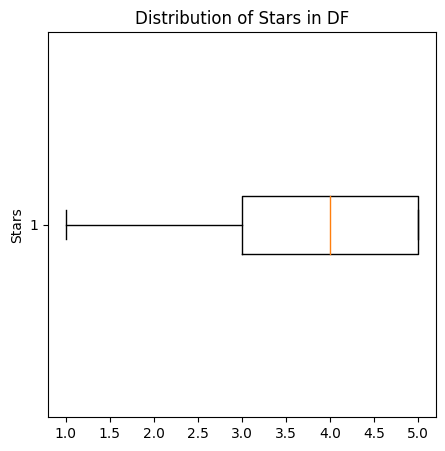

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Question No 4')
print('-------------\n')

plt.figure(figsize=(5, 5))
plt.boxplot(df['stars'],vert=False)
plt.ylabel('Stars')
plt.title('Distribution of Stars in DF')
plt.show()

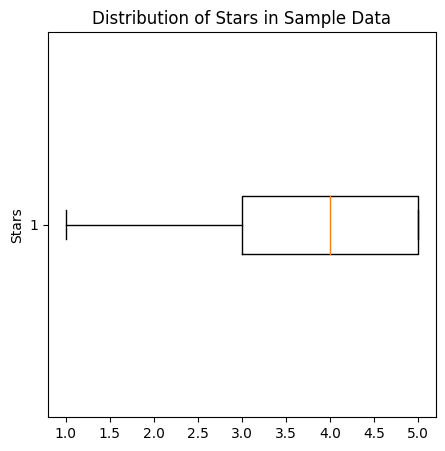

In [ ]:
plt.figure(figsize=(5, 5))
plt.boxplot(sample_data['stars'],vert=False)
plt.ylabel('Stars')
plt.title('Distribution of Stars in Sample Data')
plt.show()

<Figure size 1000x600 with 0 Axes>

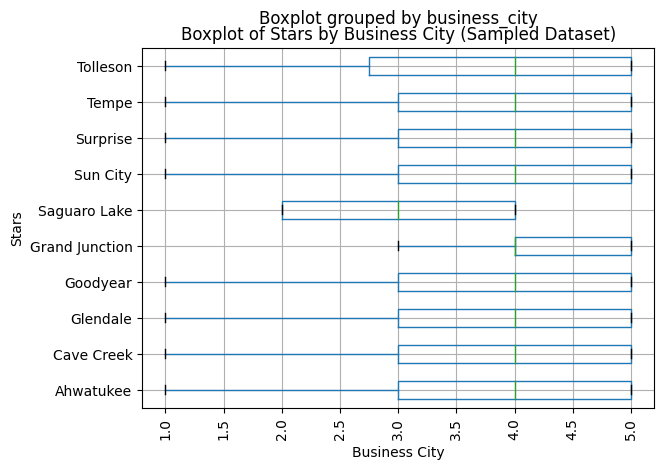

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sample_data.boxplot(column='stars', by='business_city',vert=False)
plt.title('Boxplot of Stars by Business City (Sampled Dataset)')
plt.xlabel('Business City')
plt.ylabel('Stars')
plt.xticks(rotation=90)
plt.show()

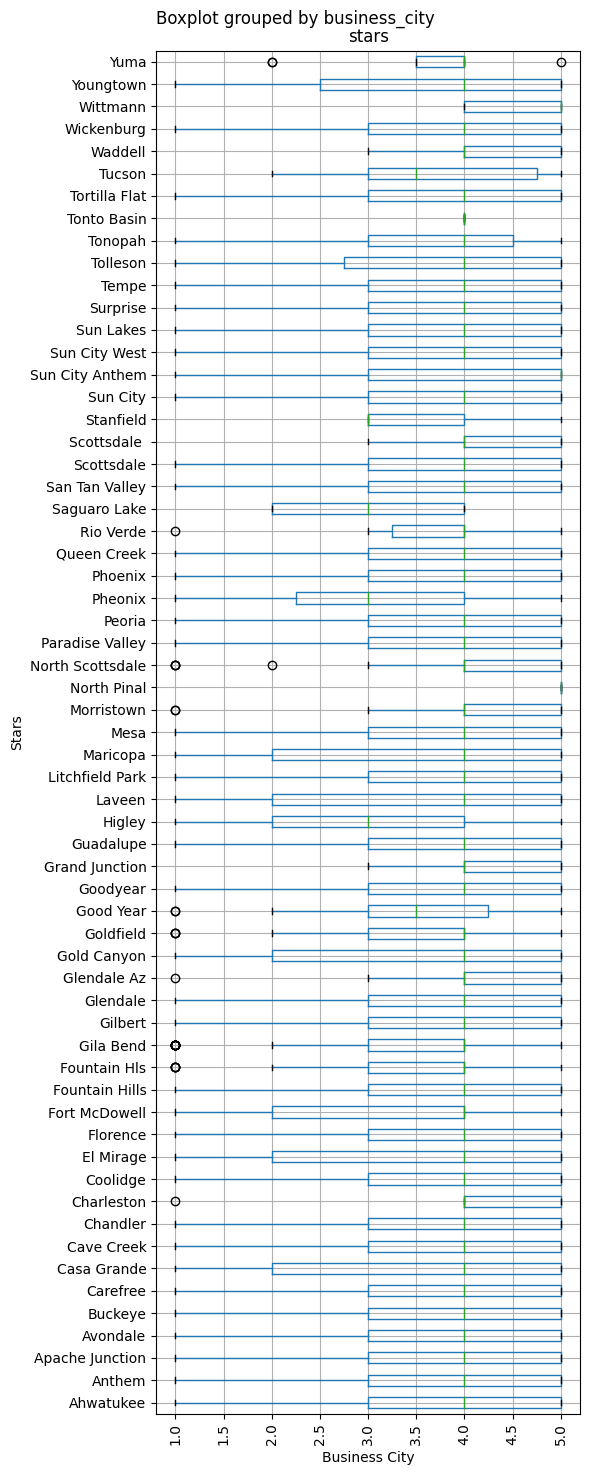

In [ ]:
fig, ax = plt.subplots(figsize=(6, 15))
df.boxplot(column='stars', by='business_city', ax=ax,vert=False)
plt.xlabel('Business City')
plt.ylabel('Stars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Cities such as Gold Canyon, Laveen, Maricopa, and others tend to provide more stars than other cities by obsering dataframe dataset (df). This result is supported by their box plot representation, in which the median line is closer to the upper quartile (Q3), showing that businesses in these cities have a higher average star rating.
But in sample data only 10 random cities are selected. Here I observed that only Tellison tends to produce hogher stars than others.

**Explaination of Code:**
There are some null and invalid values present in the data, therefore preprocessing operations are performed on them. For removing null values 
dropna() method is applied on dataset it removes null values. After this we perform dual-column filtering, where the DataFrame df is filtered based on the absence of invalid values in both the 'business_id' and 'user_id' columns simultaneously.
After this a random sample of 10 unique cities is selected from the 'business_city' column of the DataFrame 'df', and then a new DataFrame 'sample_data' is created by filtering rows where the 'business_city' is in the selected cities list.
For displaying stats summary for star column of sample data I use describe function to star column for displaying stats summary.
For computing stats summary for each city in the dataframe, the DataFrame 'df' is grouped by 'business_city', and then the number of unique 'business_id' values within each city group is calculated, resulting in a series object 'unique_business' and then I use describe function to star column for displaying stats summary.
Similarly, for computing stats summary For each business category and business ID combination in the dataframe, the DataFrame 'df' is grouped by both 'business_id' and 'business_categories', and then the number of unique 'user_id' values within each group is calculated, resulting in a series object 'unique_users' and then I use describe function to star column for displaying stats summary.
After this, I create box plot for checking distributions of stars in both sample datset and dataframe (df) dataset. For checking that some cities tends to produce higher stars than others, I create box plot for both sample data and data frame(df) where cities such as Gold Canyon, Laveen, Maricopa, and others tend to provide more stars than other cities by obsering dataframe dataset (df) and in sample dataset only Tallison tends to provide higher stars. This result is supported by their box plot representation, in which the median line is closer to the upper quartile (Q3), showing that businesses in these cities have a higher average star rating. 

**Conclusion**
The provided code performs several preprocessing and analysis tasks on a dataset. Null values are removed using the dropna() method. Invalid values in both the 'business_id' and 'user_id' columns are filtered out simultaneously. A random sample of 10 unique cities is selected, and a new DataFrame, 'sample_data', is created by filtering rows based on the selected cities. Descriptive statistics are computed for the 'stars' column in both the sample data and the original DataFrame. Additionally, statistics are computed for each city by grouping the DataFrame by 'business_city' and calculating the number of unique 'business_id' values within each city group. Similarly, statistics are computed for each business category and business ID combination by grouping the DataFrame by both 'business_id' and 'business_categories' and counting the number of unique 'user_id' values within each group. Box plots are created to visualize the distribution of stars in both the sample dataset and the original dataset, revealing cities that tend to have higher star ratings.

In [ ]:
#print(df['business_city'].nunique())

61
